# Introduction to Tensorflow Regression

In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating Dataset

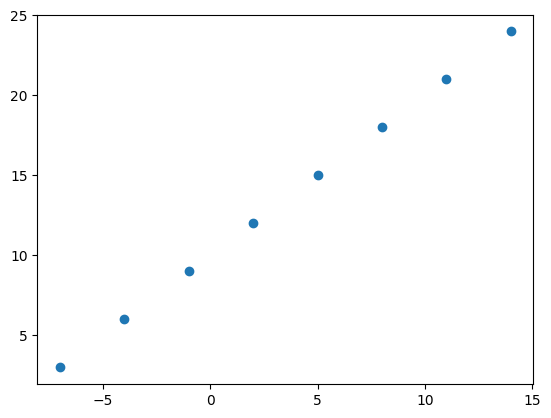

In [86]:
# Create features
X = np.arange(-7,15,3,dtype=np.float16)

# Create labels
y = np.arange(3,25,3,dtype=np.float16)

# Visualize
plt.scatter(X,y)

In [87]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [88]:
# Input and Output Shapes
X.shape, y.shape

((8,), (8,))

In [89]:
# Shape of one input element
X[0].shape

# Shape of one output element
y[0].shape

# NOTE: The shape is () since we are dealing with tensors

()

In [90]:
# Scalars have dimension 0
X[0].ndim

0

In [91]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [92]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

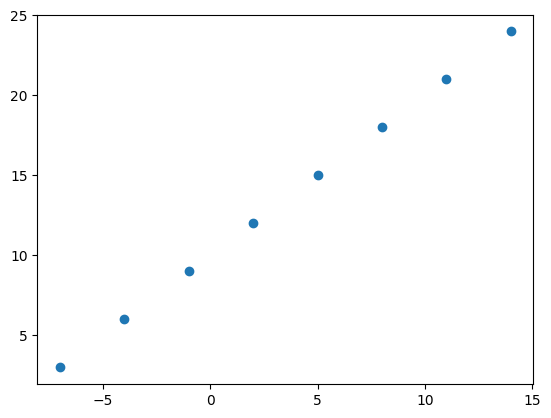

In [93]:
plt.scatter(X,y)

### Modelling with TF  - Experiment, Experiment, Experiment
1. Creating a model - define input and output layers, and the hidde layers of the NN
2. Compiling the model - Define the loss functions, optimizer and evaluation metrics
3. Fitting the model - Letting the model find the patterns between X & y (Features and labels)

Method 1:
- Add layers after creating a model from Sequential class

In [94]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with Sequential
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 416ms/step - loss: 15.3232 - mae: 15.3232
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 15.0419 - mae: 15.0419
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 14.8329 - mae: 14.8329
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 14.7004 - mae: 14.7004
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 14.5679 - mae: 14.5679
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 14.4354 - mae: 14.4354
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 14.3029 - mae: 14.3029
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 14.1704 - mae: 14.1704
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 14.0379 - mae: 14.0379
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 13.9054 - mae: 13.9054


Method 2:
- Add the layers in the Sequential API while creating the model itself

In [95]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,)) # It is 1, since we pass only 1 data pt
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 330ms/step - loss: 15.8771 - mae: 15.8771
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 15.5959 - mae: 15.5959
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 15.3146 - mae: 15.3146
Epoch 4/10
1/1 [==============================] - 0s 0s/step - loss: 15.0334 - mae: 15.0334
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 14.8197 - mae: 14.8197
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 14.6872 - mae: 14.6872
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 14.5547 - mae: 14.5547
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 14.4222 - mae: 14.4222
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 14.2897 - mae: 14.2897
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 14.1572 - mae: 14.1572


#### Predict using the trained Model

In [96]:
model_1.predict([17.0]), model_2.predict([17.0])

1/1 [==============================] - 0s 78ms/step


(array([[-1.6921302]], dtype=float32), array([[-2.8959193]], dtype=float32))

### Improving the Model
- We can improve our model by modifying the steps we took to create a model

1. **Creating a model** 
    - Add more layers
    - Increase the number of neurons in the layers
    - Change the activation function in a each layer
2. **Compiling a model**
    - Change the optimizer
    - Change the loss function
    - Change the *learning rate* of optimizer
3. **Fitting a model**
    - Change the number of epochs
    - Provide more data to learn from

In [97]:
# Changes: Increase number of epochs

# 1. create the model
improv_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
improv_model1.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 273ms/step - loss: 14.3903 - mae: 14.3903
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 14.2578 - mae: 14.2578
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 14.1253 - mae: 14.1253
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9928 - mae: 13.9928
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.8603 - mae: 13.8603
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.7278 - mae: 13.7278
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5953 - mae: 13.5953
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4628 - mae: 13.4628
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3303 - mae: 13.3303
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1978 - mae: 13.1978
Epoch 11/100
1/1 [==============================] - 0s 8ms

In [98]:
improv_model1.predict([17.0])

1/1 [==============================] - 0s 122ms/step


array([[29.885801]], dtype=float32)

##### `NOTE`: Common ways to better our DL model:
- Increase number of layers
- Increase anumber of neurons in each layer
- Change optimizer
- Change Learning Rate (The most hyperparam for most NN)
- Fitting on more data
- Fitting for more epochs

In [99]:
# Changes: improv1 + hidden layer with 50 layers + Cha

# 1. Create a model
improv_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model2.compile(loss = tf.losses.mae,
                        optimizer = tf.optimizers.Adam(0.01),
                        metrics = ["mae"])

# 3. Fit the model
improv_model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 402ms/step - loss: 9.8723 - mae: 9.8723
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1244 - mae: 9.1244
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3618 - mae: 8.3618
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5810 - mae: 7.5810
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1528 - mae: 7.1528
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3390 - mae: 7.3390
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5389 - mae: 7.5389
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5889 - mae: 7.5889
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5271 - mae: 7.5271
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3815 - mae: 7.3815
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1

In [100]:
improv_model2.predict([17.0])

# Though our loss is lesser than before, its prediction is worse. This is due to overfitting.
# Hence, our model has trained really well on training data, but on unseen data, its results are not good

1/1 [==============================] - 0s 104ms/step


array([[27.319654]], dtype=float32)

### Evaluating a Model - Visualize, Visualize, Visualize
* Visualize the data - What is the data you are working with? How does it look?
* Visualize the model - What does our model look like?
* Training of model - How does the model look while training?
* Predictions of model - How the predictions of the model compare to the ground truth?


In [101]:
# Make a larger dataset
X = tf.range(-100,100,4)
y = X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

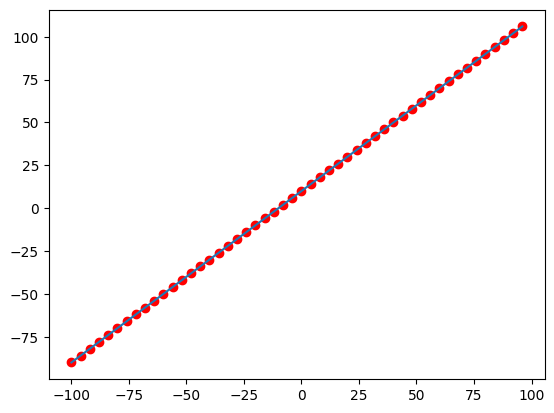

In [102]:
# Visualize the data
plt.plot(X,y)
plt.scatter(X,y,color='r')

#### The 3 datasets
> Training set
* Model learns on this data. 
* This is 70-80% of total data.
> Validation set
* Model gets tuned on this data. 
* This is 10-15% of total data.
> Test set
* Model gets evaluate on this data. 
* This is 10-15% of total data.

`We have these 3 sets to increase the model's ability to generalize`

In [103]:
len(X)

50

In [104]:
X_train = X[:40] # First 40 samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # remaining samples (20% of the data)
y_test = y[40:] 

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualizing Data

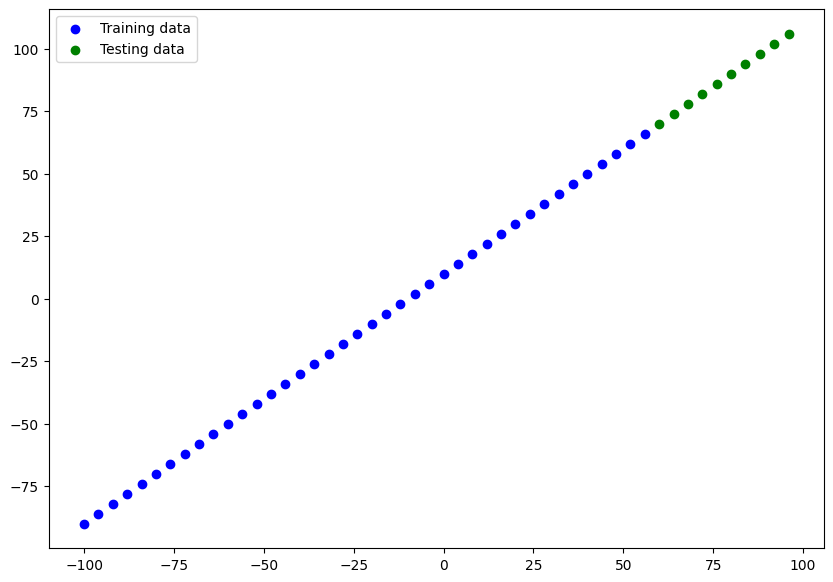

In [105]:
plt.figure(figsize=(10,7))

# Plot training data
plt.scatter(X_train, y_train, c='b', label = "Training data")

# Plot testing data
plt.scatter(X_test, y_test, c='g', label = "Testing data")

# Show legend
plt.legend()

#### Visualizing Model 
- Model Summary
- Plot_model


In [106]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)


In [107]:
## ERROR OCCURS
# model.summary()
# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [108]:
X[0].shape

TensorShape([])

In [109]:
# Let's create a model which builds automatically by defining the input_shape argument in first layer

tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_Layer"),
    tf.keras.layers.Dense(1, name="Output_Layer")
], name="model_3")

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit the model
# model.fit(X_train,y_train, epochs=100)

# NOTE: To get model summary without fitting, we need to 'build' the model or provide the input shape so it builds automatically

In [110]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total parameters - Total number of parameters in the model.
* Trainable Parameters - The parameters that the model can update
* Non-trainable parameters - The parameters that aren't updated during training (This is typical when you bring in already learned patterns and parameters from other models during **transfer learning**)

**Resources:** [MIT's Introduction to Deep Learning](https://introtodeeplearning.com/2022/index.html)

In [111]:
model.fit(X_train,y_train,epochs=100,verbose=0)

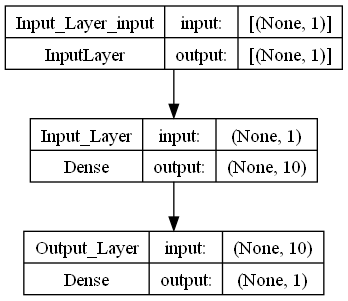

In [112]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualize Model's Predictions
- Plot the predictions (y_pred) against ground truth labels( y_train / y_test )



In [113]:
# Make predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 78.25221 ],
       [ 83.35277 ],
       [ 88.453316],
       [ 93.55388 ],
       [ 98.65443 ],
       [103.75498 ],
       [108.85554 ],
       [113.95609 ],
       [119.05664 ],
       [124.157196]], dtype=float32)

In [114]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

Create a plotting functions

In [115]:
# Create a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """ Plots training data, test data and compares the predictions to the ground truth"""

    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data,predictions,c='r',label="Predictions")
    # Show the legend
    plt.legend()

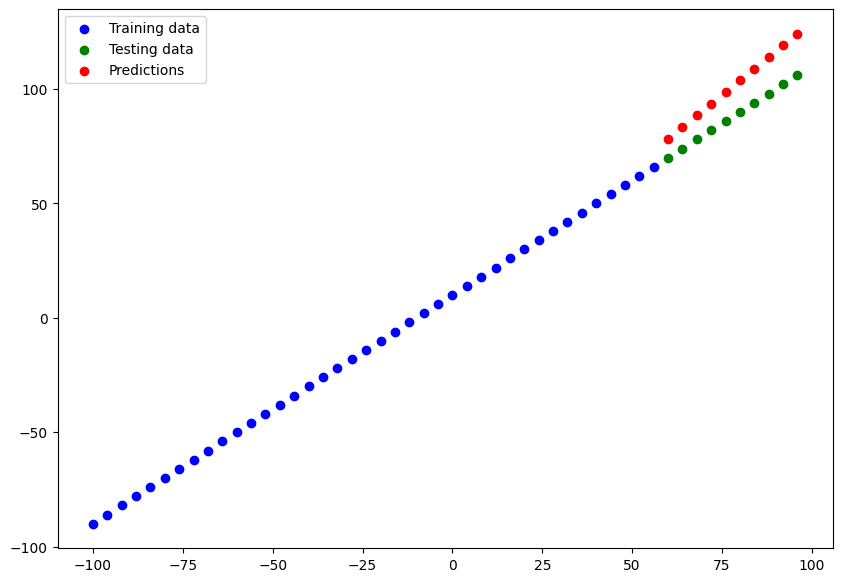

In [116]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluation Metrics for Regression Model

* MAE - Mean Absolute Error
    * Mean of absolute error
    * A starter metric for regression problems
    * Adv: It is most Robust to outliers.
    * Disadv: MAE is not differential, hence can't apply optimizers like Gradient Descent
###
* MSE - Mean Squared Error
    * Mean of squares of absolute error
    * When larger errors are more significant than smaller errors
    * Adv: MSE is differential
    * Disadv: MSE is not Robust to outliers (Outliers are penalised the most, since the deviation itself is high and we are squaring it too)
###
* Huber - Combination of MSE and MAE
    * Less sensitive to outliers than MSE
###
* RMSE - Root Mean Squared Error
    * Root of mean of squares of absolute errors
    * Adv: RMSE is differential and unit is same as output variable
    * Disadv: RMSE is not as Robust as MAE, to outliers.

In [117]:
model.evaluate(X_test,y_test)

# Metrics is MAE since metrics and loss in compiling is MAE

1/1 [==============================] - 0s 129ms/step - loss: 13.2047 - mae: 13.2047


[13.204706192016602, 13.204706192016602]

In [118]:
y_test,tf.squeeze(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 78.25221 ,  83.35277 ,  88.453316,  93.55388 ,  98.65443 ,
        103.75498 , 108.85554 , 113.95609 , 119.05664 , 124.157196],
       dtype=float32)>)

In [119]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.204706>

In [120]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=184.35678>

In [121]:
# Make a function to reuse MAE and MSE

def MAE(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def MSE(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


### Experiments to Improve Models

```
Build model -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak
```
1. Get more data for model to train on, to learn patterns and relationships between features and labels

2. Build larger models (Complex models)
    * More layers and hidden units in each layer
##
3. Train for more epochs


Build 3 models:
- Model_1 -> 1 layer and 100 epochs
- Model_2 -> 2 layers and 100 epochs
- Model_3 -> 2 layers and 500 epochs

In [122]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [123]:
# Model_1  -  1 layer and 100 epochs

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 50.2639 - mae: 50.2639
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 17.4809 - mae: 17.4809
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 16.7462 - mae: 16.7462
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 9.0329 - mae: 9.0329
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 11.0945 - mae: 11.0945
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2475 - mae: 10.2475
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 9.2551 - mae: 9.2551
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.1763 - mae: 9.1763
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 11.8088 - mae: 11.8088
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.7390 - mae: 13.7390
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss:

1/1 [==============================] - 0s 64ms/step


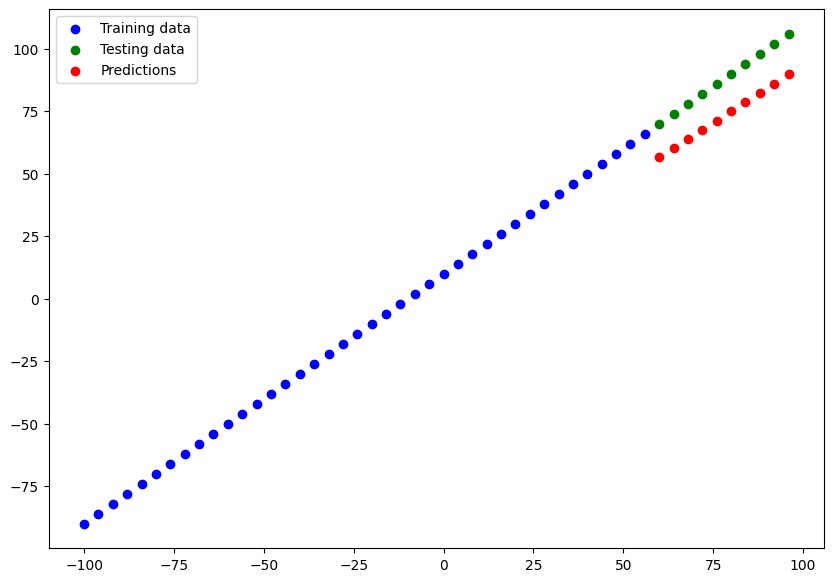

In [124]:
# Make and plot predictions for model1
y_pred1 = model1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [125]:
# Calculate model1 evaluation metrics

mae1 = MAE(y_true=y_test, y_pred=y_pred1)
mse1 = MSE(y_true=y_test, y_pred=y_pred1)
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.861667>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.69034>)

In [126]:
# Model2 - 2 layer and 100 epochs

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 41.8683 - mse: 2496.5728
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.6161 - mse: 1318.7043
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 34.6460 - mse: 1843.4652
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 17.9923 - mse: 456.5104
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 23.7515 - mse: 833.9335
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 11.3356 - mse: 143.9070
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 12.4356 - mse: 201.1674
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 11.0828 - mse: 144.2604
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.5965 - mse: 2447.7070
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 27.1038 - mse: 1033.1643
Epoch 11/100
2/2 [==============================

1/1 [==============================] - 0s 64ms/step


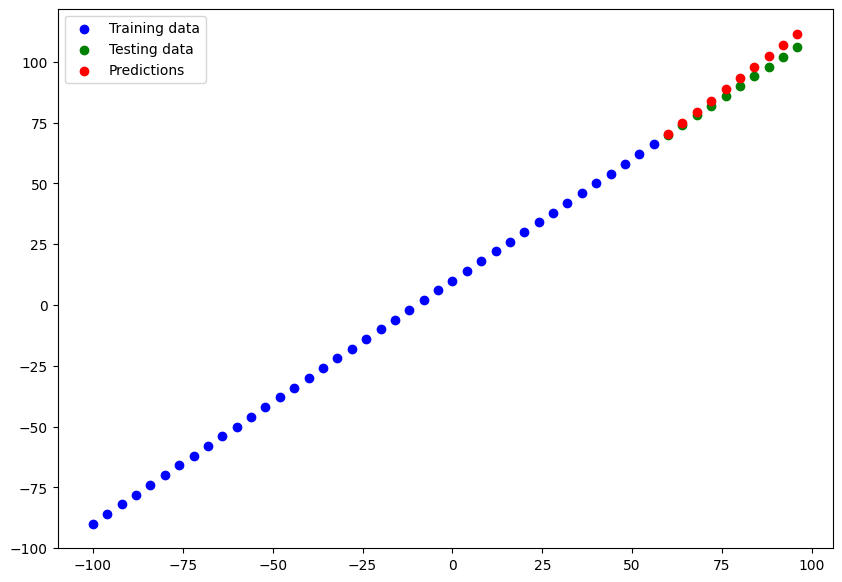

In [127]:
# Make and plot predictions for model2
y_pred2 = model2.predict(X_test)
plot_predictions(predictions=y_pred2)

In [128]:
# Calculate model2 evaluation metrics
mae2 = MAE(y_true=y_test, y_pred=y_pred2)
mse2 = MSE(y_true=y_test, y_pred=y_pred2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9097075>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.190015>)

In [129]:
# Model3 - 2 layers and 500 epochs
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model3.fit(X_train,y_train,epochs=500)
X_train,y_train

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 31.5672 - mse: 1415.5360
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.1298 - mse: 759.6805
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 30.5965 - mse: 1361.3684
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 22.0383 - mse: 694.9868
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13.2615 - mse: 214.1096
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 10.6963 - mse: 125.5846
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6428 - mse: 165.9167
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.7310 - mse: 124.7434
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 36.0026 - mse: 1970.7366
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 23.9038 - mse: 799.7142
Epoch 11/500
2/2 [=============================

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

1/1 [==============================] - 0s 64ms/step


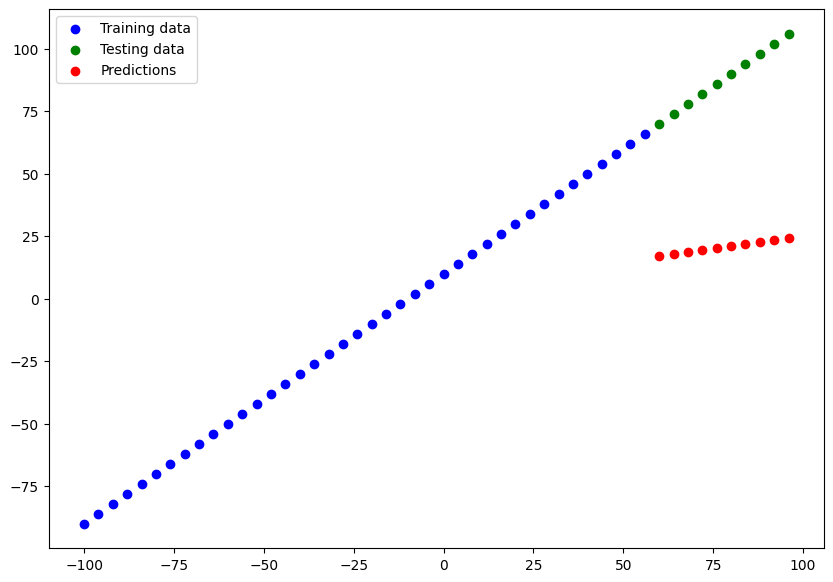

In [130]:
# Make and plot predictions for model2
y_pred3 = model3.predict(X_test)
plot_predictions(predictions=y_pred3)

In [131]:
# Create Evaluation metrics

mae3 = MAE(y_test, y_pred3)
mse3 = MSE(y_test, y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.2999>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4612.1475>)

**NOTE:** Start with small experiments and make sure they work and then increase their scale when necessary.

### Comparing the results of our Experiments

In [132]:
# Let's compare our model results with pandas dataframe

model_results = [["model1", mae1.numpy(), mse1.numpy()],
                ["model2", mae2.numpy(), mse2.numpy()],
                ["model3", mae3.numpy(), mse3.numpy()]]

results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
results

,Model,MAE,MSE
0,model1,14.861667,221.690338
1,model2,2.909708,11.190015
2,model3,67.299896,4612.147461


In [133]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                20        
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


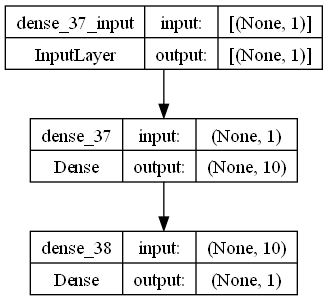

In [134]:
plot_model(model2, show_shapes=True)

**NOTE:** A main goal should be to minimize the time between each experiment.
EXPERIMENT, EXPERIMENT, EXPERIMENT

#### Tracking Model Experiments

To track the results of your experiments:
**Resource:**
- Tensorboard
    * A component of TensorFlow lib, to help track modelling experiments
##
- Weights & Bias
    * A tool for tracking all kinds of ML Experiments(plugs directly into Tensorboard)

### Saving Models

Format:
- SavedModel Format - A way to serialize models. Restored with load_model
- HDF5 Format - Saved using HDF5 standards. Uses the .h5 
    - Best format when using the model universally

In [135]:
# Save model using SavedModel format
model2.save("Best_Reg_model")

INFO:tensorflow:Assets written to: Best_Reg_model\assets


In [136]:
# Save model using HDF5 format
model2.save("Best_reg_model_hd5f.h5")

#### Load Models

In [137]:
# Load in SavedModel format model
loaded_savedmodel = tf.keras.models.load_model("./Best_Reg_model/")
loaded_savedmodel.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                20        
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [138]:
# compare the model_2 predictions with savedModel format predictions
# The predictions are same

y_pred2 = model2.predict(X_test)
loaded_savedmodel_pred = loaded_savedmodel.predict(X_test)
y_pred2 == loaded_savedmodel_pred

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [139]:
MAE(y_true=y_test, y_pred = y_pred2) == MAE(y_true=y_test, y_pred=loaded_savedmodel_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [140]:
# Load in HDF5 format model
loaded_HDF5_model = tf.keras.models.load_model("Best_reg_model_hd5f.h5")
loaded_HDF5_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                20        
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [141]:
y_pred2 = model2.predict(X_test)
loaded_HDF5_model_pred = loaded_HDF5_model.predict(X_test)
y_pred2 == loaded_HDF5_model_pred

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Medical Cost Prediction Dataset

In [148]:
insurance = pd.read_csv("Datasets\insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [149]:
# Numerical Encoding (To convert all values to numerical values)
#   -> One Hot Encoding
insurance_onehot = pd.get_dummies(insurance,)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [150]:
# Create X & y (Features and Labels)
X = insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]
y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [161]:
# Splitting Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values.astype(np.float32),y.values.astype(np.float32),test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [162]:
X_train

array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]],
      dtype=float32)

In [164]:
# Neural Network

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["MAE"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 8723.5410 - MAE: 8723.5410
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7860.4404 - MAE: 7860.4404
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7583.4209 - MAE: 7583.4209
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7770.9629 - MAE: 7770.9629
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7692.5308 - MAE: 7692.5308
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7622.6475 - MAE: 7622.6475
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.3213 - MAE: 7549.3213
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7773.0024 - MAE: 7773.0024
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7583.5479 - MAE: 7583.5479
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7739.4668 - MAE: 7739.4668

In [165]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8854.0898 - MAE: 8854.0898


[8854.08984375, 8854.08984375]

##### Experiments
- Add extra layers with more hidden units
- Train for longer

In [169]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

history = insurance_model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [170]:
insurance_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4765.3379 - mae: 4765.3379


[4765.337890625, 4765.337890625]

#### Plotting the loss curve:

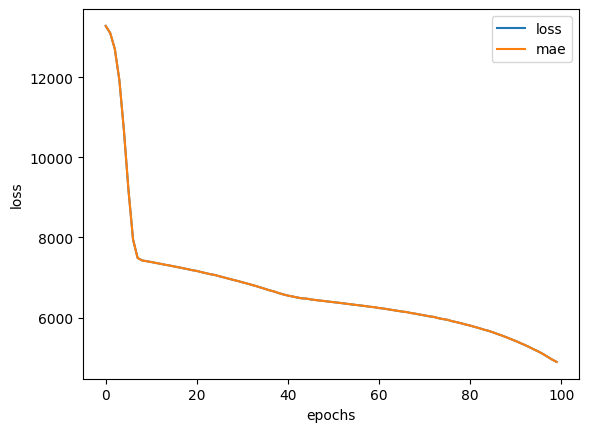

In [171]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

### Preprocessing data
- Normalization
- Standardization